In [190]:
!pip install mlxtend --quiet

In [191]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)


In [192]:
from sklearn.model_selection        import train_test_split
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
#from sklearn.linear_model           import Ridge
#from sklearn.linear_model           import Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network         import MLPClassifier
from sklearn.ensemble               import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics                import f1_score
from sklearn.metrics                import accuracy_score
from sklearn.metrics                import precision_score
from sklearn.metrics                import recall_score
from sklearn.metrics import roc_auc_score, log_loss


In [193]:
init_notebook_mode(connected=True)

In [194]:
# The code was removed by Watson Studio for sharing.

In [195]:
def plotJmeter(df,title):
    traces=[]
    for transaction in df['transaction'].unique():
        trace = go.Scatter(
            y=df[df['transaction']==transaction]['avg'],
            x=df[df['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction
        )    
        traces.append(trace)
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="Response Time (ms)"
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [196]:
def plotJmeter2(df1,df2,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress"
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)        
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="Response Time (ms)"
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [197]:
def plotSkydiveFlows2(df1,df2,title,y_feature,y_title):
    traces=[]
    for name in df1['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df1[df1['_source.NodeTID']==name][y_feature],
            x=df1[df1['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name+" with no background stress"
        )    
        traces.append(trace)
    for name in df2['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df2[df2['_source.NodeTID']==name][y_feature],
            x=df2[df2['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name+" with background stress"
        )    
        traces.append(trace)           
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title=y_title
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [198]:
def plotSkydiveFlows(df,title,y_feature,y_title):
    traces=[]
    for name in df['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df[df['_source.NodeTID']==name][y_feature],
            x=df[df['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name
        )    
        traces.append(trace)        
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
            ),
            yaxis=dict(
                title=y_title
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [199]:
def plot4(df1,df2,df3,df4,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)             
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(
                       
            domain=[0, 1]
        ),
        yaxis=dict(
            title="response time (QoE)",
            domain=[0.55, 1]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0, 1],
            anchor='y2'
        ),


        yaxis2=dict(
            title="RTT (QoE)",
            domain=[0, 0.45]
            
        ),
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [200]:
def plotQoEQoS(df1,df2,df3,df4,y_feature,y_title1,y_title2,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name][y_feature],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name][y_feature],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)             
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(
                       
            domain=[0, 1]
        ),
        yaxis=dict(
            title=y_title1,
            domain=[0.55, 1]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0, 1],
            anchor='y2'
        ),


        yaxis2=dict(
            title=y_title2,
            domain=[0, 0.45]
            
        ),
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [201]:
def plot6(df1,df2,df3,df4,df5,df6,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)
    for name in df5['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df5[df5['_source.NodeTID']==name]['time_to_FIN'],
            x=df5[df5['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x3',
            yaxis='y3'
        )    
        traces.append(trace)
    for name in df6['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df6[df6['_source.NodeTID']==name]['time_to_FIN'],
            x=df6[df6['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x3',
            yaxis='y3'            
        )    
        traces.append(trace)            
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(                       
            domain=[0, 1],
            anchor='y2'
        ),
        yaxis=dict(
            title="response time (QoE)",
            domain=[0, 0]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0.55, 1],
            anchor='y2'
            
        ),
        yaxis2=dict(
            title="RTT (QoE)",
            domain=[0, 0.45]
            
        ),
        xaxis3=dict(
            #title="time",
            domain=[0.55, 1],
            anchor='y3'
        ),
        yaxis3=dict(
            title="Time to FIN (QoE)",
            domain=[0, 1]
            
        ),        
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [202]:
#deprecated
def _plotModelEstimates(actual,prediction,xTitle,yTitle,title,names):
    #s = list(map(str,df['begin']))
    #print(s)
    xList = list(range(len(actual)))
    actualBar = go.Scatter(
        y=actual,
        #x=df[xFeature].astype(str),
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='actual'
        #text=actual,
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    predictionBar = go.Scatter(
        y=prediction,
        #x=df[xFeature].astype(str),
        x = xList,
        mode = 'markers',
        connectgaps=False,        
        name='prediction'
        #text=prediction,
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
  
    
    data = [actualBar,predictionBar]
    if(len(names)>2):
        shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[0], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[0], 
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            },
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[1], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[1], # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            },
                        },
                    ]
       
    else:
        shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[0], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[0], # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle,
                tickformat=',d'
            ),
            shapes=shapes
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [203]:
def plotWithBoundaries(df,yFeature,xTitle,yTitle,title,low,high):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[yFeature])))
    #xList = list(df[xFeature].unique())
    trace = go.Bar(
        y=df[yFeature],
        #x=df[xFeature].astype(str),
        x=xList,
        name='sample'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    data = [trace]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
        
        
    layout = go.Layout(
            #barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle
                #tickvals=df[xFeature].astype(str),
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [204]:
def plotWithBoundaries2(df,yFeature1,yFeature2,xTitle,yTitle,title,low,high):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[yFeature1][yFeature2])))
    #xList = list(df[xFeature].unique())
    trace = go.Bar(
        y=df[yFeature1][yFeature2],
        #x=df[xFeature].astype(str),
        x=xList,
        name='sample'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    data = [trace]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
        
        
    layout = go.Layout(
            #barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle
                #tickvals=df[xFeature].astype(str),
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [205]:
def plot4MsWithThreshholds(df,xFeature,yFeature,xTitle,yTitle,title,low,high):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[xFeature])))
    xList = list(df[xFeature].unique())
    minBar = go.Bar(
        y=df[yFeature]['min'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='min'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    meanBar = go.Bar(
        y=df[yFeature]['mean'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='mean'
        #text=df[yFeature]['mean'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    medianBar = go.Bar(
        y=df[yFeature]['median'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='median'
        #text=df[yFeature]['median'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    maxBar = go.Bar(
        y=df[yFeature]['max'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='max'
        #text=df.duration['max'],
        #textposition="outside",
        #opacity=5,
        #width=1,
        #orientation='vertical'
        
    )
    
    data = [maxBar,medianBar,meanBar,minBar]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
        
        
    layout = go.Layout(
            barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [206]:
def plot4Ms(df,xFeature,yFeature,xTitle,yTitle,title):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[xFeature])))
    minBar = go.Bar(
        y=df[yFeature]['min'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='min'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    meanBar = go.Bar(
        y=df[yFeature]['mean'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='mean'
        #text=df[yFeature]['mean'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    medianBar = go.Bar(
        y=df[yFeature]['median'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='median'
        #text=df[yFeature]['median'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    maxBar = go.Bar(
        y=df[yFeature]['max'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='max'
        #text=df.duration['max'],
        #textposition="outside",
        #opacity=5,
        #width=1,
        #orientation='vertical'
        
    )
    
    data = [maxBar,medianBar,meanBar,minBar]
    #data = [maxBar,meanBar,minBar]
    layout = go.Layout(
            barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle
            )
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [207]:
def getdfLaterHalf(df,time):    
    halfway =  (df[time].min() + (df[time].max() - df[time].min()) / 2)    
    return(df[df[time] >= halfway])


In [208]:
def getRTTDiff(df):
    dfRTTDiff = df[['_source.TrackingID','_source.Metric.Last','_source.NodeTID','_source.Metric.RTT']].copy()
    dfRTTDiff.sort_values(by=['_source.TrackingID','_source.Metric.Last','_source.NodeTID'], ascending=[True,True,True], inplace=True)
    dfRTTDiff['diffs'] = dfRTTDiff.groupby(['_source.TrackingID'])['_source.Metric.RTT'].transform(lambda x: x.diff().abs())
    #print(dfRTTDiff.head(10))
    dfRTTDiff = dfRTTDiff.groupby(['_source.TrackingID'], as_index=False).agg({'_source.NodeTID': ' - '.join, '_source.Metric.Last': 'first','diffs' : 'last'})
    return(dfRTTDiff)


In [209]:
## Examine multiple samples

def plotAgg2(df1,df2,yAgg1,yfeature1,yAgg2,yfeature2,xfeature,yname1,yname2,xtitle,ytitle,title):
    traces=[]
    trace = go.Scatter(
            y=df1[yAgg1][yfeature1],
            x=df1[xfeature],
            mode = 'markers',
            connectgaps=True,
            name=yname1
    )    
    traces.append(trace)
    trace = go.Scatter(
            y=df2[yAgg2][yfeature2],
            x=df2[xfeature],
            mode = 'markers',
            connectgaps=True,
            name=yname2
    )    
    traces.append(trace)
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title=xtitle
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title=ytitle
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [210]:
def massageJmeter(df):
    df = df[df.transaction != 'internal']
    #df = df[df['transaction'] == 'all']  # for now just to get an overall average
    df = df[df['statut'] == 'ok']
    df["time"] = pd.to_datetime(df["time"],unit='ms')
    #df["avg"] = df["avg"].apply(lambda x: x*1000000)
    df = df.dropna(subset=['avg'])
    df['avg'] = df['avg'].astype(int)
    q = df['avg'].quantile(0.99)
    df = df[df['avg']<q]
    return(df)    
   

In [211]:
def massageIndex(df,begin_plus,end_less):
    df.begin = df.begin + (begin_plus*60000)
    df.end = df.end - (end_less*60000)
    df["stress_test"] = df["stress_test"].astype(str)
    dfIndex["stress_test"] = dfIndex["stress_test"].replace("no_stress"," no_stress")
    df["stress_test"] = df["stress_test"].replace(to_replace=r'^stress-*',value='',regex=True)
    df["stress_test"] = df["stress_test"].replace(to_replace=r'_test.yaml',value='',regex=True)
    df["stress_test"] = df["stress_test"].replace(to_replace=r'r1g1',value='',regex=True)
    q = df['elapse_time'].quantile(0.99)
    df = df[df['elapse_time']<q] 
    return(df)

In [212]:
def labelDF(dfLabels,df,time):
    a = df[time].values
    bh = dfLabels.end.values
    bl = dfLabels.begin.values

    i, j = np.where((a[:, None] > bl) & (a[:, None] < bh))

    return (pd.DataFrame(
        np.column_stack([df.values[i], dfLabels.values[j]]),
        columns=df.columns.append(dfLabels.columns)
    ))

In [213]:
def maxMedian(dfIndex,dfJmeter):
    maxM=0
    maxBegin=0
    maxEnd=0
    maxStress=''
    noStressIndex=0
    for index, row in dfIndex.iterrows():
        if row.stress_test == "no_stress":
            noStressIndex=index
            continue
        df=dfJmeter[(dfJmeter['time'] > row.begin) & (dfJmeter['time'] < row.end)]
        m=df.avg.median()
        if m > maxM:
            maxM=m
            maxIndex=index
            maxStress=row.stress_test
            maxNoStressPair=noStressIndex
    return(maxIndex,maxNoStressPair)        


In [214]:
def getDFs(suffixes):
    jMeterFrame = []
    skydiveFrame = []
    indexFrame = []
    for s in suffixes:
        dfTemp,err = getDF("jmeter{}.csv".format(s))
        if err != "":
            print(err)
            raise Error(err)
        jMeterFrame.append(dfTemp)    
       
    
        dfTemp,err = getDF("skydiveFlows{}.csv".format(s))
        if err != "":
            print(err)
            raise Error(err)
        skydiveFrame.append(dfTemp)
        temp=pd.concat(skydiveFrame)
        if not temp[temp.duplicated()].empty:
            print("ERROR duplicates found in skydiveFlows when adding suffix",s)
        
        dfTemp,err = getDF("workload_stress_begin_end_{}.csv".format(s))    
        if err != "":
            print(err)
            raise Error(err)
        indexFrame.append(dfTemp)
        temp=pd.concat(indexFrame)
        if not temp[temp.duplicated()].empty:
            print("ERROR duplicates found in index when adding suffix",s)
        
        
    dfJmeter=pd.concat(jMeterFrame)
    dfSkydiveFlows=pd.concat(skydiveFrame)
    dfIndex=pd.concat(indexFrame)            
    
    return(dfJmeter,dfSkydiveFlows,dfIndex)

In [215]:
def massageSkydiveFlows(df,isTraining):
    #print(df.columns)
   
    df = df[df['Application'] == 'TCP']
    df = df[df['Transport.Protocol'] == 'TCP']
    df = df[df['Transport.B'] == 80]
    
    if(isTraining):
        print(df.shape)
        df = df[df.groupby(['begin'])['seq'].transform(max) != df['seq']]
        print("max seq removed",df.shape)
        df = df[df.groupby(['begin'])['seq'].transform(min) != df['seq']]
        print("min seq removed",df.shape)
    #print(df.count()) 
    df = df.dropna(subset=['Metric.Last','Metric.Start','Metric.RTT','Metric.ABBytes','Metric.BABytes','Metric.ABPackets'])
    df['Metric.RTT'] = df['Metric.RTT'].astype(int).dropna()
    df['Metric.ABBytes'] = df['Metric.ABBytes'].astype(int).dropna()
    df['Metric.BABytes'] = df['Metric.BABytes'].astype(int).dropna()
    df['Metric.ABPackets'] = df['Metric.ABPackets'].astype(int).dropna()
    df['Metric.BAPackets'] = df['Metric.BAPackets'].astype(int).dropna()
    #df['IPMetric.FragmentErrors'] = df['IPMetric.FragmentErrors'].astype(int).dropna() 
    #df['IPMetric.Fragments'] = df['IPMetric.Fragments'].astype(int).dropna() 

    
    df['ABBytes_prev'] = df.groupby('UUID')['Metric.ABBytes'].transform(lambda x: x.shift())
    df['ABBytes_prev'] = df['ABBytes_prev'].fillna(0)
    df['BABytes_prev'] = df.groupby('UUID')['Metric.BABytes'].transform(lambda x: x.shift())
    df['BABytes_prev'] = df['BABytes_prev'].fillna(0)
    df['ABPackets_prev'] = df.groupby('UUID')['Metric.ABPackets'].transform(lambda x: x.shift())
    df['ABPackets_prev'] = df['ABPackets_prev'].fillna(0)
    df['BAPackets_prev'] = df.groupby('UUID')['Metric.BAPackets'].transform(lambda x: x.shift())
    df['BAPackets_prev'] = df['BAPackets_prev'].fillna(0)
    df['Last_prev'] = df.groupby('UUID')['Metric.Last'].transform(lambda x: x.shift())
    df['Last_prev'] = df['Last_prev'].fillna(0)
    #print(df[['begin','seq','UUID','Metric.BABytes','BABytes_prev','Metric.Last']].head(50))
    
    df['flow_duration'] = df['Metric.Last'] - (df['Metric.Start'] + df['Last_prev'])
    df = df.dropna(subset=['flow_duration'])
    df = df[(df[['flow_duration']] != 0).all(axis=1)]
    df['flow_duration'] = df['flow_duration'].astype(int).dropna()
    
    df['ABBytes'] =  df['Metric.ABBytes'] - df['ABBytes_prev']
    df['BABytes'] =  df['Metric.BABytes'] - df['BABytes_prev']
    df['ABPackets'] =  df['Metric.ABPackets'] - df['ABPackets_prev']
    df['BAPackets'] =  df['Metric.BAPackets'] - df['BAPackets_prev']

    df['bytes'] = df['ABBytes'] + df['BABytes']
    df['packets'] = df['ABPackets'] + df['BAPackets']  
    
    df['AB_bytes_per_flow'] = df['ABBytes']  / df['flow_duration']
    df['BA_bytes_per_flow'] = df['BABytes']  / df['flow_duration']
    df['bytes_per_flow'] = df['bytes'] / df['flow_duration']
    
    df['packets_per_flow'] =  df['packets'] / df['flow_duration']
    df['AB_packets_per_flow'] = df['ABPackets'] / df['flow_duration']
    df['BA_packets_per_flow'] = df['BAPackets'] / df['flow_duration']
    #df['flow_duration'] = df['flow_duration'].apply(lambda x: x*100) # convert to ms
    #print(dfSkydiveFlowsNoStress[['flow_duration','Metric.RTT']].head(10)) 
    df['Metric.Last'] = pd.to_datetime(df['Metric.Last'],unit='ms')
    df['Metric.Start'] = pd.to_datetime(df['Metric.Start'],unit='ms')
    #tempDF = df[df.duplicated(['UUID']) == True]
    #print(tempDF[['UUID','Metric.Last']])
    #print(tempDF.head(50))
    #print("before-",df[df.duplicated(['UUID'])])
    #print("before",df[df.duplicated(subset=['UUID'])[['UUID','bytes','Metric.Last']])

    #print(df[['begin','seq','UUID','Metric.BABytes','BABytes_prev','Metric.Last']].tail(50))
    
    #df['NodeTID'] = df['NodeTID'].replace(['c989a779-c295-52da-6041-3f287488faa1'],'wp_eth0')
    #df['NodeTID'] = df['NodeTID'].replace(['8c451cd5-a37f-5e51-7d89-8c2cc2c5e88d'],'calico')
    #df = df[df['NodeTID'] != 'b40081de-0060-5816-54c4-c3907e470941']
    #q = df['Metric.RTT'].quantile(0.99)
    #df = df[df['Metric.RTT']<q]

    #q = df['flow_duration'].quantile(0.99)
    #df = df[df['flow_duration']<q] 
    #print(df.columns) 
    #print(df)
    #print(df[['UUID','Metric.BABytes','BABytes_prev','BABytes']].head(50))
    #print(df[['UUID','Metric.ABBytes','ABBytes_prev','ABBytes']].head(50))
    #print(df[['UUID','Metric.BAPackets','BAPackets_prev','BAPackets']].head(50))
    #print(df[['UUID','Metric.ABPackets','ABPackets_prev','ABPackets']].head(50))

    #print(df[['UUID','Metric.BABytes','BABytes_prev','Metric.Last','Metric.Start','Last_prev','flow_duration']].head(50))
    
    #print(df[['UUID','begin','seq']].head(50))
    #print(df[['UUID','begin','seq']].tail(50))

    #print(df[idxNotMin][['UUID','begin','seq']].head(50))
    #print(df[idxNotMax][['UUID','begin','seq']].tail(50))
    #print(list(idxMax.index.values))
    return(df)
    

In [216]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  

#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703","190707","190710"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703","190710"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190728"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190728","190729","190730"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190807"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190808"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190808","190810","190811","190813","190815",'190816']) # this is for wp4
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190822","190826","190828","190829","190915","190922"]) # these are for wp5

dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["191007","191010","191012","191016",'191023','191201','191202']) # these are for wp5 with V2 of test driver
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["191007"]) # these are for wp5 with V2 of test driver
#print("Training Sample",dfIndex.shape[0])

benchmarkUnderTest = "wp5"

In [217]:
                                            
#dfIndex = massageIndex(dfIndex,1,2.5)
dfIndex = massageIndex(dfIndex,0,0)

    
dfJmeterLabeled = labelDF(dfIndex,dfJmeter,'time')


#dfSkydiveFlowsLabeled = labelDF(dfIndex,dfSkydiveFlows,'_source.Metric.Last')
dfSkydiveFlowsLabeled = dfSkydiveFlows
  
dfJmeterLabeled = massageJmeter(dfJmeterLabeled)
dfSkydiveFlowsLabeled = massageSkydiveFlows(dfSkydiveFlowsLabeled,True)

dfJmeterLabeled = dfJmeterLabeled[dfJmeterLabeled.begin.isin(dfSkydiveFlowsLabeled.begin.unique())]
dfIndex = dfIndex[dfIndex.begin.isin(dfSkydiveFlowsLabeled.begin.unique())]
dfSkydiveFlowsLabeled = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled.begin.isin(dfIndex.begin.unique())]

(464640, 43)
max seq removed (441202, 43)
min seq removed (420207, 43)


In [218]:
#print(dfSkydiveFlowsLabeled.count())
#print(dfSkydiveFlowsLabeled[['begin','seq','UUID','stress_test','Metric.Last']].head(50))

In [219]:
 
pd.options.mode.chained_assignment = None

#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190630"])
#fJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190703"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190627","190628","190703"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190806"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190806","190807","190812"]) # these are for wp4
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190906","190907"]) # these are for wp5
dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["191025"]) # these are for wp5 with test_driver_v2.py


#dfIndex = massageIndex(dfIndex,1,2.5)
dfIndexTest = massageIndex(dfIndexTest,0,0)
#print('dfIndexTest shape',dfIndexTest.shape)
    
dfJmeterLabeledTest = labelDF(dfIndexTest,dfJmeter,'time')

#dfSkydiveFlowsLabeledTest = labelDF(dfIndexTest,dfSkydiveFlows,'_source.Metric.Last')
dfSkydiveFlowsLabeledTest = dfSkydiveFlows
dfJmeterLabeledTest = massageJmeter(dfJmeterLabeledTest)
dfSkydiveFlowsLabeledTest = massageSkydiveFlows(dfSkydiveFlowsLabeledTest,False)

dfJmeterLabeledTest = dfJmeterLabeledTest[dfJmeterLabeledTest.begin.isin(dfSkydiveFlowsLabeledTest.begin.unique())]

dfIndexTest = dfIndexTest[dfIndexTest.begin.isin(dfSkydiveFlowsLabeledTest.begin.unique())]
dfSkydiveFlowsLabeledTest = dfSkydiveFlowsLabeledTest[dfSkydiveFlowsLabeledTest.begin.isin(dfIndexTest.begin.unique())]

  


# Estimating Client Satisfaction (QoE) from Server Side Network QoS metrics
See PoC and notebook description [here](https://github.com/KennethNagin/slicenet/blob/master/docs/QoEfromQoSwithSkydiver.md)

In [220]:
dfIndexLabeledAgg = dfIndex.groupby(['stress_test']).agg({'elapse_time': ['min','max','median','mean','std']}).dropna().reset_index()
#dfJmeterLabeledAgg = dfJmeterLabeled.groupby(['begin','application']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'flow_duration': ['min','max','median','mean','std','count','sum']}).dropna().reset_index()
dfSkydiveFlowsRTTLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'Metric.RTT': ['min','max','median','mean','std','sum']}).dropna().reset_index()
#dfJmeterLabeledAggTest = dfJmeterLabeledTest.groupby(['begin','application']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()

dfSkydiveFlowsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'flow_duration': ['min','max','median','mean','std','count','sum']}).dropna().reset_index()
dfSkydiveFlowsRTTLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'Metric.RTT': ['min','max','median','mean','std','sum']}).dropna().reset_index()

dfSkydiveFlowsBytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABBytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'AB_bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABBytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'AB_bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBABytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'BA_bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBABytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'BA_bytes_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()

dfSkydiveFlowsPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'AB_packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'AB_packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'BA_packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'BA_packets_per_flow': ['min','max','median','mean','std','sum']}).dropna().reset_index()


dfSkydiveFlowsBytesLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'bytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBytesLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'bytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABBytesLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'ABBytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABBytesLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'ABBytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBABytesLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'BABytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBABytesLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'BABytes': ['min','max','median','mean','std','sum']}).dropna().reset_index()

dfSkydiveFlowsPacketsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'packets': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsPacketsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'packets': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABPacketsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'ABPackets': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsABPacketsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'ABPackets': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'BAPackets': ['min','max','median','mean','std','sum']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'BAPackets': ['min','max','median','mean','std','sum']}).dropna().reset_index()

#dfSkydiveFlowsFragmentErrorsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'IPMetric.FragmentErrors': ['min','max','median','mean','std','sum']}).dropna().reset_index()
#dfSkydiveFlowsFragmentErrorsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'IPMetric.FragmentErrors': ['min','max','median','mean','std','sum']}).dropna().reset_index()
#dfSkydiveFlowsFragmentsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'IPMetric.Fragments': ['min','max','median','mean','std','sum']}).dropna().reset_index()
#dfSkydiveFlowsFragmentsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'IPMetric.Fragments': ['min','max','median','mean','std','sum']}).dropna().reset_index()

In [221]:
#print(dfJmeterLabeledAgg)
#dfMerged = pd.merge(df1,df2,left_on='begin',right_on='begin').dropna()
#df1 = dfSkydiveFlowsLabeled.groupby(['begin','seq']).agg({'flow_duration': ['count']}).reset_index()
#print("df1",df1.shape)
#print(df1.head(20))
#df2 = dfIndex.drop(['end','qoeBefore','qoeAfter'],axis=1)
dfIndexMerged = pd.merge(dfIndex,dfSkydiveFlowsLabeledAgg,left_on=['begin'],right_on='begin')
#print(dfMerged.count)
print("dfSkydiveFlowsLabeledAgg",dfSkydiveFlowsLabeledAgg.shape)
print("dfIndexMerged",dfIndexMerged.shape)
#print(dfMerged[['begin','seq','stress_test','elapse_time','range']].head(20))
#df1 = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({'flow_duration': ['count']}).reset_index()

#print(df1.head(20))
#df2 = dfIndexTest.drop(['end','qoeBefore','qoeAfter'],axis=1)
dfIndexTestMerged = pd.merge(dfIndexTest,dfSkydiveFlowsLabeledAggTest,left_on=['begin'],right_on='begin')
#print(dfMerged.count)
print("dfSkydiveFlowsLabeledTest",dfSkydiveFlowsLabeledAggTest.shape)
print("dfIndexTestMerged",dfIndexTestMerged.shape)



dfSkydiveFlowsLabeledAgg (5824, 9)
dfIndexMerged (5824, 15)
dfSkydiveFlowsLabeledTest (1901, 9)
dfIndexTestMerged (1901, 15)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [222]:
#dfIndexSeqCount = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'seq': ['count']}).reset_index()
dfIndexSeqCount = dfSkydiveFlowsLabeled.groupby(['begin'])['seq'].nunique()
print("dfIndexSeqCount",dfIndexSeqCount)
print("dfIndex",dfIndex)
print("dfIndex shape",dfIndex.shape)
print("dfIndexSeqCount shape",dfIndexSeqCount.shape)
dfIndexTemp = dfIndex
dfIndexTemp["Seqs"] = dfIndexSeqCount
print("dfIndexTemp",dfIndexTemp)



dfIndexSeqCount begin
1570454741259     6
1570455241571    10
1570456055283     4
1570456559471    11
1570457595728    10
                 ..
1575384161322    10
1575384996014    12
1575386028467    14
1575387150873    14
1575388342782    13
Name: seq, Length: 762, dtype: int64
dfIndex     workload         stress_test          begin            end      qoeBefore  \
10   wp5.jmx           no_stress  1570454741259  1570455203673  1570440356142   
11   wp5.jmx  iperf-d-5xP60-b10G  1570455241571  1570456009176  1570455198144   
12   wp5.jmx           no_stress  1570456055283  1570456521408  1570455999405   
13   wp5.jmx  iperf-d-5xP60-b10G  1570456559471  1570457443501  1570456515723   
14   wp5.jmx           no_stress  1570457595728  1570458365347  1570457432269   
..       ...                 ...            ...            ...            ...   
219  wp5.jmx       iperf-d-3xP50  1575384161322  1575384939037  1575384087255   
220  wp5.jmx       iperf-d-2xP60  1575384996014  1575385942702  1

### Classification boundaries where the QoE target is Benchmark Duration. 
Classifications based on benchmark durations with no backgroud stress: 
* Binary Classification decision boundaries:  
 * good: range(0,quantile(0.99))
 * bad: range(quantile(0.99),infinity)
* MultiClass Classification decision boundaries:
 * good: range(0,quantile(0.70))
 * acceptable: range(quantile(0.70),quantile(0.99))
 * bad: range(quantile(0.99),infinity)

In [223]:
def createClassificationStats(dfIn,dfStats,Classificaton_Type,Sample_Set,QoE,count_name):
    i = 0
    for r in dfIn.groupby('range')['elapse_time'].count().reset_index(name='Count').to_dict(orient='records'):
        dfStats = dfStats.append({
            'Classification': Classificaton_Type,
            'Class': i,
            'Range': r['range'],
            'QoE': QoE[i],
            'Sample Set': Sample_Set,
            count_name: r['Count']        
        },ignore_index=True)
        i = i+1
    return(dfStats)


def indexedDistribution(dfTraining,dfTesting,count_name):
    bins = [0,indexNoStressHigh,np.inf]
    bottom = "0-{}".format(indexNoStressHigh)
    top = "{}-infinity".format(indexNoStressHigh)
    names = [bottom,top]
    dfClassificationStats = pd.DataFrame(columns = ['Classification' ,"QoE", 'Class', 'Range','Sample Set', count_name])
    dfIndexTemp = dfTraining
    dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
    dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Binary","Training",["good","bad"], count_name)
    dfIndexTemp = dfTesting
    dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
    dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Binary","Testing",["good","bad"], count_name)
    bins = [0,indexNoStressLow,indexNoStressHigh,np.inf]
    bottom = "0-{}".format(indexNoStressLow)
    middle =  "{}-{}".format(indexNoStressLow,indexNoStressHigh)
    top = "{}-infinity".format(indexNoStressHigh)
    names = [bottom,middle,top]
    dfIndexTemp = dfTraining
    dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
    dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Multiclass","Training",["good","acceptable","bad"], count_name)
    dfIndexTemp = dfTesting
    dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
    dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Multiclass","Testing",["good","acceptable","bad"],count_name)
    table = ff.create_table(dfClassificationStats)    
    iplot(table)

In [224]:
dfIndexLabeledAgg = dfIndex.groupby(['stress_test']).agg({'elapse_time': ['min','max','median','mean','std']}).dropna().reset_index()
dfIndexNoStressAgg  = dfIndexLabeledAgg[dfIndexLabeledAgg["stress_test"] == " no_stress"]
dfIndexNoStress  = dfIndex[dfIndex["stress_test"] == " no_stress"]
indexNoStressLow = round(max(dfIndexNoStressAgg['elapse_time']['median']))
medianDuration_plus = round(max(dfIndexNoStressAgg['elapse_time']['median']+dfIndexNoStressAgg['elapse_time']['std']*3))
maxDuration = round(max(dfIndexNoStressAgg['elapse_time']['max']))
#q = dfIndexNoStress['elapse_time'].quantile(0.99)
#indexNoStressHigh = min(medianDuration_plus,maxDuration)
indexNoStressHigh = round(dfIndexNoStress['elapse_time'].quantile(0.99))
indexNoStressLow = round(dfIndexNoStress['elapse_time'].quantile(0.70))



In [225]:
    
print("benchmark under test",benchmarkUnderTest)
print("training set benchmark instances",dfIndex.shape[0])
print("training set one minute segments",dfIndexMerged.shape[0])
print("testing set benchmark instances",dfIndexTest.shape[0])
print("testing set one minute segments",dfIndexTestMerged.shape[0])
indexedDistribution(dfIndex,dfIndexTest,"Benchmark Instances")
indexedDistribution(dfIndexMerged,dfIndexTestMerged,"one-minute segments")

benchmark under test wp5
training set benchmark instances 762
training set one minute segments 5824
testing set benchmark instances 198
testing set one minute segments 1901


In [226]:
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','benchmark instances (no_stress only)','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Single threshold for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndex.sort_values(by=['elapse_time']),'elapse_time','benchmark instances','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexTest.sort_values(by=['elapse_time']),'elapse_time','benchmark instances','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','benchmark instances (no_stress only)','benchmark duration (ms)','Workload Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Multiple thresholds for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndex.sort_values(by=['elapse_time']),'elapse_time','benchmark instances','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndexTest.sort_values(by=['elapse_time']),'elapse_time','benchmark instances','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)

In [227]:
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','one-minute segments (no_stress only)','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Single threshold for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexMerged.sort_values(by=['elapse_time']),'elapse_time','one-minute segments','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexTestMerged.sort_values(by=['elapse_time']),'elapse_time','one-minute segments','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','one-minute segments (no_stress only)','benchmark duration (ms)','Workload Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Multiple thresholds for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndexMerged.sort_values(by=['elapse_time']),'elapse_time','one-minute segments','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndexTestMerged.sort_values(by=['elapse_time']),'elapse_time','one-minute segments','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)

In [228]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_auc_score, log_loss
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
@ignore_warnings(category=UserWarning)
@ignore_warnings(category=ConvergenceWarning)

def QoEEstimator(classifiers,X_train, y_train,X_test,y_test):
    np.seterr(over='ignore')

    #print("training set size",X_train.shape[0])
    #print("testing set size",y_test.shape[0])

    dfValidationScores = pd.DataFrame(columns = ['Classifier' , 'f1_score', 'accuracy_score', 'log_loss_score','precision_score', 'recall_score'])
    #dfValidationScores = pd.DataFrame()
    yPairs = {}
    for f in classifiers:
        clf = f    
        clf_name = str(clf)[0:str(clf).index('(')]
        #print(clf_name)
        s = time.clock()
        model = clf.fit(X_train, y_train)
        e = time.clock()
        modelFitTime = e - s
        s = time.clock()
        y_pred = model.predict(X_test) 
        e = time.clock()
        predictionTime = e - s
        #print(metrics.confusion_matrix(y_test, y_pred))
#       fScore = f1_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
        fScore = f1_score(y_test, y_pred,average='micro',labels=np.unique(y_pred))
        accuracyScore = accuracy_score(y_test, y_pred)
        #roc_aucScore = roc_auc_score(y_test,y_pred)
        log_lossScore = log_loss(y_test,model.predict_proba(X_test))
        yPairs[clf_name] = {
            "y_test": y_test,
            "y_pred": y_pred,
            "classifier": clf_name,            
            "f1_score": fScore,
            "accuracy_score": accuracyScore,
            #"roc_auc_score" : roc_aucScore,
            "log_loss_score" : log_lossScore,
            #"predictionTime": predictionTime,
            #"modelFitTime": modelFitTime
        }
        if modelFitTime > 3:
            print("{} modelFitTime {}".format(clf_name,modelFitTime))
        if predictionTime > 1:
            print("{} predictionTime {}".format(clf_name,predictionTime))
             
   
        dfValidationScores = dfValidationScores.append({'Classifier' : clf_name , 
                                              'f1_score' : fScore,
                                              'accuracy_score' : accuracyScore,
                                              #'roc_auc_score' : roc_aucScore,
                                              'log_loss_score' : log_lossScore,
                                              'precision_score': precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred)),
                                              'recall_score'  : recall_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
                                              #"predictionTime": predictionTime,         
                                              #'modelFitTime'  : modelFitTime},                                                                                           
                                            },ignore_index=True)                     
    dfValidationScores = dfValidationScores.sort_values(
#       by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
        by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3).reset_index()
    dfValidationScores.drop(["index"],axis=1,inplace=True)
    bestClassifier = dfValidationScores.at[0,'Classifier']    
    #table = ff.create_table(dfValidationScores)    
    return(yPairs[bestClassifier], dfValidationScores)


In [229]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_auc_score, log_loss
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
@ignore_warnings(category=UserWarning)
@ignore_warnings(category=ConvergenceWarning)

def QoEEstimatorMulticlass(classifiers,X_train, y_train,X_test,y_test):
    np.seterr(over='ignore')

    #print("training set size",X_train.shape[0])
    #print("testing set size",y_test.shape[0])

    dfValidationScores = pd.DataFrame(columns = ['Classifier' , 'f1_score', 'accuracy_score', 'log_loss_score','precision_score', 'recall_score'])
    #dfValidationScores = pd.DataFrame()
    yPairs = {}
    for f in classifiers:
        clf = f    
        clf_name = str(clf)[0:str(clf).index('(')]
        #print(clf_name)
        s = time.clock()
        model = clf.fit(X_train, y_train)
        model.out_activation_ = 'softmax'
        e = time.clock()
        modelFitTime = e - s
        s = time.clock()
        y_pred = model.predict(X_test) 
        e = time.clock()
        predictionTime = e - s
        #print(metrics.confusion_matrix(y_test, y_pred))
#       fScore = f1_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
        fScore = f1_score(y_test, y_pred,average='micro',labels=np.unique(y_pred))
        accuracyScore = accuracy_score(y_test, y_pred)
        #roc_aucScore = roc_auc_score(y_test,y_pred)
        log_lossScore = log_loss(y_test,model.predict_proba(X_test))
        yPairs[clf_name] = {
            "y_test": y_test,
            "y_pred": y_pred,
            "classifier": clf_name,            
            "f1_score": fScore,
            "accuracy_score": accuracyScore,
            #"roc_auc_score" : roc_aucScore,
            "log_loss_score" : log_lossScore,
            #"predictionTime": predictionTime,
            #"modelFitTime": modelFitTime
        }
        if modelFitTime > 3:
            print("{} modelFitTime {}".format(clf_name,modelFitTime))
        if predictionTime > 1:
            print("{} predictionTime {}".format(clf_name,predictionTime))
             
   
        dfValidationScores = dfValidationScores.append({'Classifier' : clf_name , 
                                              'f1_score' : fScore,
                                              'accuracy_score' : accuracyScore,
                                              #'roc_auc_score' : roc_aucScore,
                                              'log_loss_score' : log_lossScore,
                                              'precision_score': precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred)),
                                              'recall_score'  : recall_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
                                              #"predictionTime": predictionTime,         
                                              #'modelFitTime'  : modelFitTime},                                                                                           
                                            },ignore_index=True)                     
    dfValidationScores = dfValidationScores.sort_values(
#       by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
        by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3).reset_index()
    dfValidationScores.drop(["index"],axis=1,inplace=True)
    bestClassifier = dfValidationScores.at[0,'Classifier']    
    #table = ff.create_table(dfValidationScores)    
    return(yPairs[bestClassifier], dfValidationScores)


## Estimate Workload Duration (QoE) from measured QoS features.  
* Evaluate for Binary Classification and Multiclass Classification
* Evaluate with all of the ML classifiers
* Evaluate with all of combinations of QoS Features
* Compare the evaluation methods (classifier and feature combination) and determine the best performer

In [230]:
def compareSeries(actual,prediction):
    same = []
    ac = []
    pr = []
    i = 0
    for a in actual:
        p = prediction[i]
        if a == p:
            same.append(a)
            ac.append(np.nan)
            pr.append(np.nan)
        else:
            same.append(np.nan)
            ac.append(a)
            pr.append(p)
        i=i+1
    return(same,ac,pr)        
def plotModelEstimates(actual,prediction,xTitle,yTitle,title,names):
    same, ac, pr = compareSeries(actual,prediction)
    xList = list(range(len(actual)))
    sameTrace = go.Scatter(
        y=same,
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='same'
    )    
    actualTrace = go.Scatter(
        y=ac,
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='actual'
    )
    predictionTrace = go.Scatter(
        y=pr,
        x = xList,
        mode = 'markers',
        connectgaps=False,        
        name='prediction'
    ) 
    
    data = [sameTrace,actualTrace,predictionTrace]
    layout = go.Layout(
            height=300,
            title=title,
            xaxis=dict(
                title=xTitle
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle,
                tickformat=',d'
            )
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [231]:
def getSeriesWithEstimates(actualClassification,predictionClassification,actual_in):
    same = []
    over = []
    under = []
    actual = list(actual_in)
    i = 0
    for aClass in actualClassification:
        pClass = predictionClassification[i]
        a = actual[i]
        if aClass == pClass:
            same.append(a)
            over.append(np.nan)
            under.append(np.nan)
        elif pClass > aClass:
            same.append(np.nan)
            over.append(a)
            under.append(np.nan)
        else:
            same.append(np.nan)
            over.append(np.nan)
            under.append(a)            
        i=i+1
    return(same,over,under)
def plotSortedEstimations(y_list,xTitle,yTitle,title,shapes):
    y_series = pd.Series(y_list).dropna()
    xList = list(range(len(y_series)))
    trace = go.Bar(
        y=y_series.sort_values(),
        x=xList
    )
    layout = go.Layout(
            title=title,
            xaxis=dict(
                title=xTitle
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes
    )    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
def plotWithBoundariesAndEstimations(df,xFeature,yFeature,xTitle,yTitle,title,low,high,actualClassification,predictionClassification):
    same,over,under = getSeriesWithEstimates(actualClassification,predictionClassification,df[yFeature])
    same_series = pd.Series(same).dropna().sort_values()
    over_series = pd.concat([pd.Series([np.NaN]*same_series.size),pd.Series(over).dropna().sort_values()])
    under_series = pd.concat([pd.Series([np.NaN]*over_series.size),pd.Series(under).dropna().sort_values()])
    #print(over_series)
    xList = list(range(len(df[xFeature])))
    correctTrace = go.Bar(
        y=same_series,
        #x=xList,
        x=list(range(len(same_series))),
        name='Correct Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    overTrace = go.Bar(
        y=over_series,
        #x=xList,
        x=list(range(len(over_series))),
        name='Over Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    underTrace = go.Bar(
        y=under_series,
        #x=df[xFeature].astype(str),
        #x=xList,
        x=list(range(len(under_series))),
        name='Under Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )    
    data = [correctTrace,overTrace,underTrace]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(under_series),
                            #'x1': len(same_series),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(under_series),
                            #'x1': len(same_series),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(under_series),
                            #'x1': len(same_series),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    layout = go.Layout(
            title=title,
            xaxis=dict(
                title=xTitle,
                categoryorder="category ascending"
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
    #plotSortedEstimations(same,xTitle,yTitle,title+"<br>Correct Estimation",shapes)
    #plotSortedEstimations(over,xTitle,yTitle,title+"<br>Over Estimation",shapes)
    #plotSortedEstimations(under,xTitle,yTitle,title+"<br>Under Estimation",shapes)




In [232]:
def plotScores(x,y,xTitle,yTitle,title):
    trace1 = go.Scatter(
        y = y,
        x = [r.replace(",","<br>") for r in x],
        mode = 'markers',
        marker=dict(color= y, colorscale='RdBu', size=14, colorbar=dict(thickness=20),cmin=0,cmax=1),
        #marker=dict(color= y, color_continuous_scale=px.colors.sequential.Viridis),
        connectgaps=False,      
        orientation='v'
    )
  
    
    data = [trace1]
    layout = go.Layout(
            #barmode='group',
            title=title,
            xaxis=dict(
                title=xTitle,
                tickfont=dict(size=8)
                #categoryorder="category ascending"
            ),
            yaxis=dict(
                title=yTitle,
                range=[0.00, 1.00]
                #autorange=True
                #tickformat=',d'
                
            ),
            margin=dict(b=200)
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [233]:
dfFeatures = pd.DataFrame()    
dfFeatures['flow_duration_mean'] = dfSkydiveFlowsLabeledAgg['flow_duration']['mean']
dfFeatures['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['mean'] 
dfFeatures['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['mean'] 
dfFeatures['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['mean'] 
dfFeatures['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['mean'] 
dfFeatures['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['mean'] 
dfFeatures['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['mean']
dfFeatures['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']
dfFeatures['flow_duration_max'] = dfSkydiveFlowsLabeledAgg['flow_duration']['max']
dfFeatures['bytes_per_flow_max'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['max'] 
dfFeatures['packets_per_flow_max'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['max'] 
dfFeatures['AB_bytes_per_flow_max'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['max'] 
dfFeatures['BA_bytes_per_flow_max'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['max'] 
dfFeatures['AB_packets_per_flow_max'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['max'] 
dfFeatures['BA_packets_per_flow_max'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['max']
dfFeatures['RTT_max'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['max']
dfFeatures['flow_duration_min'] = dfSkydiveFlowsLabeledAgg['flow_duration']['min']
dfFeatures['bytes_per_flow_min'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['min'] 
dfFeatures['packets_per_flow_min'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['min'] 
dfFeatures['AB_bytes_per_flow_min'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['min'] 
dfFeatures['BA_bytes_per_flow_min'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['min'] 
dfFeatures['AB_packets_per_flow_min'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['min'] 
dfFeatures['BA_packets_per_flow_min'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['min']
dfFeatures['RTT_min'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['min']
dfFeatures['flow_duration_std'] = dfSkydiveFlowsLabeledAgg['flow_duration']['std']
dfFeatures['bytes_per_flow_std'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['std'] 
dfFeatures['packets_per_flow_std'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['std'] 
dfFeatures['AB_bytes_per_flow_std'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['std'] 
dfFeatures['BA_bytes_per_flow_std'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['std'] 
dfFeatures['AB_packets_per_flow_std'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['std'] 
dfFeatures['BA_packets_per_flow_std'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['std']
dfFeatures['RTT_std'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['std']
dfFeatures['flow_duration_median'] = dfSkydiveFlowsLabeledAgg['flow_duration']['median']
dfFeatures['bytes_per_flow_median'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['median'] 
dfFeatures['packets_per_flow_median'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['median'] 
dfFeatures['AB_bytes_per_flow_median'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['median'] 
dfFeatures['BA_bytes_per_flow_median'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['median'] 
dfFeatures['AB_packets_per_flow_median'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['median'] 
dfFeatures['BA_packets_per_flow_median'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['median']
dfFeatures['RTT_median'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['median']


dfFeatures['flow_duration_count'] = dfSkydiveFlowsLabeledAgg['flow_duration']['count']
dfFeatures['flow_duration_sum'] = dfSkydiveFlowsLabeledAgg['flow_duration']['sum']
dfFeatures['bytes_per_flow_sum'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['sum'] 
dfFeatures['packets_per_flow_sum'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['sum'] 
dfFeatures['AB_bytes_per_flow_sum'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['sum'] 
dfFeatures['BA_bytes_per_flow_sum'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['sum'] 
dfFeatures['AB_packets_per_flow_sum'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['sum'] 
dfFeatures['BA_packets_per_flow_sum'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['sum']
dfFeatures['RTT_sum'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['sum']

dfFeatures['bytes_sum'] = dfSkydiveFlowsBytesLabeledAgg['bytes']['sum'] 
dfFeatures['packets_sum'] = dfSkydiveFlowsPacketsLabeledAgg['packets']['sum']
dfFeatures['ABBytes_sum'] = dfSkydiveFlowsABBytesLabeledAgg['ABBytes']['sum'] 
dfFeatures['BABytes_sum'] = dfSkydiveFlowsBABytesLabeledAgg['BABytes']['sum']
dfFeatures['ABPackets_sum'] = dfSkydiveFlowsABPacketsLabeledAgg['ABPackets']['sum'] 
dfFeatures['BAPackets_sum'] = dfSkydiveFlowsBAPacketsLabeledAgg['BAPackets']['sum']

#dfFeatures['FragmentErrors_sum'] = dfSkydiveFlowsFragmentErrorsLabeledAgg['IPMetric.FragmentErrors']['sum']
#dfFeatures['Fragments_sum'] = dfSkydiveFlowsFragmentsLabeledAgg['IPMetric.Fragments']['sum']






print("features shape",dfFeatures.shape)
print("dfIndexMerged shape",dfIndexMerged.shape)

features shape (5824, 55)
dfIndexMerged shape (5824, 16)


In [234]:
dfFeatures['QoE'] = dfIndexMerged['elapse_time']


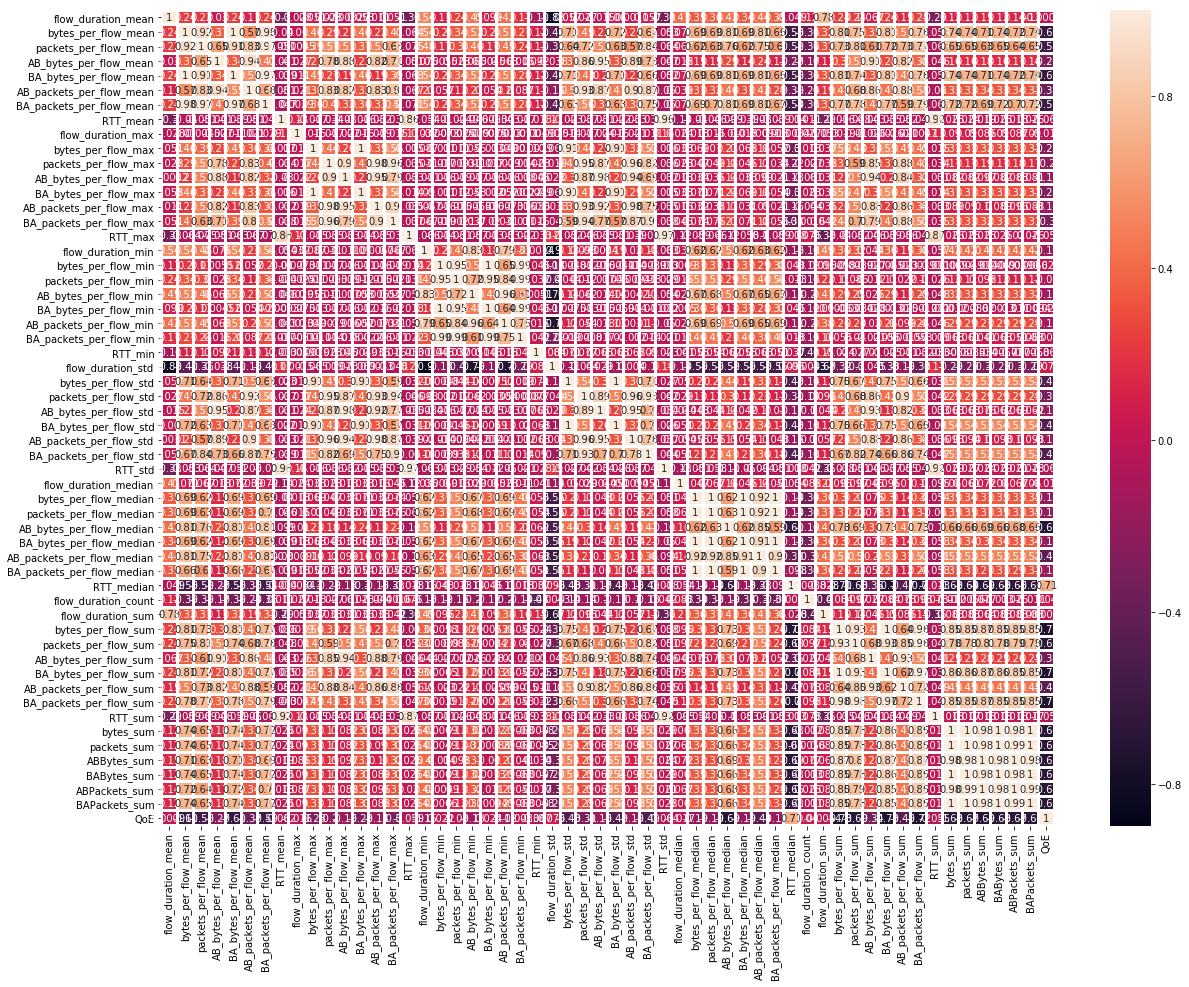

In [235]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
corrMatrix = dfFeatures.corr()
sn.heatmap(corrMatrix, annot=True,linewidths=2)
plt.show()


In [236]:
temp = dfFeatures
#print(temp.columns)
tst = temp.drop(["QoE"],axis=1).apply(lambda x: x.corr(temp.QoE)).to_frame().round(2)
#tst = temp2.to_frame()
sorted = tst.sort_values(tst.columns[0], ascending = False)
#sn.heatmap(sorted, annot=True,cbar=False,center=0,linewidths=.5,cmap="YlGnBu")
#sn.heatmap(sorted, annot=True,cbar=False,center=0,linewidths=.5)
print(sorted)
#sn.heatmap(sorted, annot=True,cbar=False,linewidths=.5)





                               0
RTT_median                  0.71
flow_duration_std           0.08
flow_duration_count         0.04
bytes_per_flow_min          0.02
BA_bytes_per_flow_min       0.02
flow_duration_mean         -0.00
BA_packets_per_flow_min    -0.00
flow_duration_sum          -0.01
flow_duration_max          -0.02
flow_duration_median       -0.02
packets_per_flow_min       -0.03
RTT_sum                    -0.05
RTT_mean                   -0.06
RTT_std                    -0.06
RTT_max                    -0.06
RTT_min                    -0.07
AB_packets_per_flow_min    -0.12
AB_bytes_per_flow_min      -0.13
AB_packets_per_flow_max    -0.14
BA_packets_per_flow_median -0.14
flow_duration_min          -0.15
AB_packets_per_flow_std    -0.15
AB_bytes_per_flow_std      -0.16
AB_bytes_per_flow_max      -0.16
packets_per_flow_median    -0.19
BA_bytes_per_flow_median   -0.19
bytes_per_flow_median      -0.19
packets_per_flow_max       -0.20
AB_bytes_per_flow_mean     -0.27
BA_bytes_p

In [237]:
_features = pd.DataFrame()    
#_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAgg['flow_duration']['mean']
#_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['mean'] 
#_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['mean'] 
#_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['mean'] 
#_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['mean'] 
#_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['mean'] 
#_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['mean']
#_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']
#_features['flow_duration_count'] = dfSkydiveFlowsLabeledAgg['flow_duration']['count']
_features['bytes_sum'] = dfSkydiveFlowsBytesLabeledAgg['bytes']['sum'] 
_features['packets_sum'] = dfSkydiveFlowsPacketsLabeledAgg['packets']['sum'] 
_features['ABPackets_sum'] = dfSkydiveFlowsABPacketsLabeledAgg['ABPackets']['sum'] 
_features['BABytes_sum'] = dfSkydiveFlowsBABytesLabeledAgg['BABytes']['sum']
_features['BAPackets_sum'] = dfSkydiveFlowsBAPacketsLabeledAgg['BAPackets']['sum'] 
_features['ABBytes_sum'] = dfSkydiveFlowsABBytesLabeledAgg['ABBytes']['sum'] 
_features['bytes_per_flow_sum'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['sum'] 
_features['packets_per_flow_sum'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['sum'] 
#_features['AB_bytes_per_flow_sum'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['sum'] 
_features['BA_bytes_per_flow_sum'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['sum'] 
#_features['AB_packets_per_flow_sum'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['sum'] 
_features['BA_packets_per_flow_sum'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['sum']

#_features.dropna(inplace=True)
#print("targets shape",targets.shape)
print("_features shape",_features.shape)


_test_features = pd.DataFrame()    
#_test_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAggTest['flow_duration']['mean']
#_test_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAggTest['bytes_per_flow']['mean'] 
#_test_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAggTest['packets_per_flow']['mean'] 
#_test_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAggTest['AB_bytes_per_flow']['mean'] 
#_test_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAggTest['BA_bytes_per_flow']['mean'] 
#_test_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAggTest['AB_packets_per_flow']['mean'] 
#_test_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest['BA_packets_per_flow']['mean']
#_test_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']
#_test_features['flow_duration_count'] = dfSkydiveFlowsLabeledAggTest['flow_duration']['count']
_test_features['bytes_sum'] = dfSkydiveFlowsBytesLabeledAggTest['bytes']['sum'] 
_test_features['packets_sum'] = dfSkydiveFlowsPacketsLabeledAggTest['packets']['sum'] 
_test_features['ABPackets_sum'] = dfSkydiveFlowsABPacketsLabeledAggTest['ABPackets']['sum'] 

_test_features['BABytes_sum'] = dfSkydiveFlowsBABytesLabeledAggTest['BABytes']['sum']
_test_features['BAPackets_sum'] = dfSkydiveFlowsBAPacketsLabeledAggTest['BAPackets']['sum'] 
_test_features['ABBytes_sum'] = dfSkydiveFlowsABBytesLabeledAggTest['ABBytes']['sum'] 

_test_features['bytes_per_flow_sum'] = dfSkydiveFlowsBytesPerFlowLabeledAggTest['bytes_per_flow']['sum'] 
_test_features['packets_per_flow_sum'] = dfSkydiveFlowsPacketsPerFlowLabeledAggTest['packets_per_flow']['sum'] 
#_test_features['AB_bytes_per_flow_sum'] = dfSkydiveFlowsABBytesPerFlowLabeledAggTest['AB_bytes_per_flow']['sum'] 
_test_features['BA_bytes_per_flow_sum'] = dfSkydiveFlowsBABytesPerFlowLabeledAggTest['BA_bytes_per_flow']['sum'] 
#_test_features['AB_packets_per_flow_sum'] = dfSkydiveFlowsABPacketsPerFlowLabeledAggTest['AB_packets_per_flow']['sum'] 
_test_features['BA_packets_per_flow_sum'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest['BA_packets_per_flow']['sum']

print("_test_features shape",_test_features.shape)
print("QoS features:")
for f in list(_features.columns):
    print("      ",f)


_features shape (5824, 10)
_test_features shape (1901, 10)
QoS features:
       bytes_sum
       packets_sum
       ABPackets_sum
       BABytes_sum
       BAPackets_sum
       ABBytes_sum
       bytes_per_flow_sum
       packets_per_flow_sum
       BA_bytes_per_flow_sum
       BA_packets_per_flow_sum


Classifiers:
       LogisticRegression
       DecisionTreeClassifier
       KNeighborsClassifier
       LinearDiscriminantAnalysis
       RandomForestClassifier
       GaussianNB
       AdaBoostClassifier
       QuadraticDiscriminantAnalysis
Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.


Binary
LogisticRegression predictionTime 1.0100000000020373
LinearDiscriminantAnalysis predictionTime 1.1200000000026193

The best scoring classifier and features from the Binary


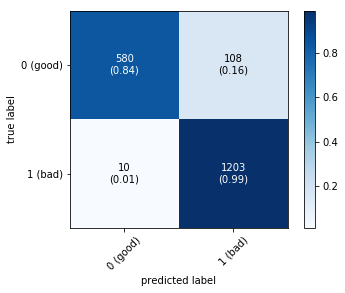


The figure below illustates the best performing classifier from the Binary



The table below shows the first 10 highest scoring Binary



Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations




Multiclass

The best scoring classifier and features from the Multiclass


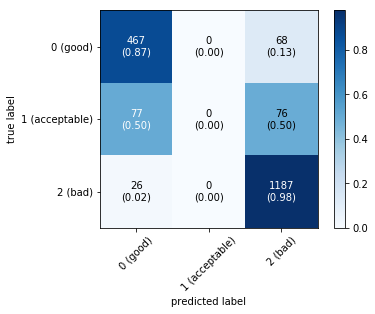


The figure below illustates the best performing classifier from the Multiclass



The table below shows the first 10 highest scoring Multiclass



Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations



Summary


In [238]:
#with warnings.catch_warnings():
# ignore all caught warnings
#  warnings.filterwarnings("ignore")
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)    
import itertools as it
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_depth=5),
               KNeighborsClassifier(3),
               LinearDiscriminantAnalysis(),
               #RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
               RandomForestClassifier(),
               GaussianNB(),
               #SVC(probability=True),
               #MLPClassifier(alpha=1, max_iter=1000),
               #GaussianProcessClassifier(1.0 * RBF(1.0)),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis()]
#classifiers = [LogisticRegression(),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(3),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
#               GaussianNB(),SVC(),MLPClassifier()]
#classifiers = [LogisticRegression(),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0)]
classifications=[
    {
        'desc':"Binary",
        'bins':[0,indexNoStressHigh,np.inf],
        'names':['0 (good)','1 (bad)'],
        #'names':[0,1],
        'low': indexNoStressHigh,
        'high':indexNoStressHigh
    },
    {
        'desc':"Multiclass",
        'bins':[0,indexNoStressLow,indexNoStressHigh,np.inf],
        'names': ['0 (good)','1 (acceptable)','2 (bad)'], 
        #'names': [0,1,2], 
        'low': indexNoStressLow,
        'high':indexNoStressHigh

        
    }
]
#_test_features.dropna(inplace=True)
#print("_test_features nan",_test_features.isna())



#print("Do ML Classification")
#print("training set size",_features.shape[0])
#print("testing set size",_test_features.shape[0])

print("Classifiers:")
for clf in classifiers:
    print("      ",str(clf)[0:str(clf).index('(')])
print("Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.")
bestFrames = []
for classification in classifications:
    print("")
    print("")
    print("{}".format(classification["desc"]))    
    dfCombinationScores = pd.DataFrame(columns = ['Classification','Classifier','Features','f1_score','accuracy_score','log_loss_score'])
    #dfCombinationScores = pd.DataFrame()
    bestClassifiers = []
    qoeTables=[]
    scores=[] 
    bins = classification['bins']
    names = classification['names']
    #targets = pd.cut(dfIndex['elapse_time'], bins,labels=names)
    #test_targets = pd.cut( dfIndexTest['elapse_time'], bins,labels=names)
    targets = pd.cut(dfIndexMerged['elapse_time'], bins,labels=names)
    #print("targets shape",targets.shape)
    test_targets = pd.cut( dfIndexTestMerged['elapse_time'], bins,labels=names)
    #print("targets test shape",test_targets.shape)
    for i in range(1,_features.shape[1]+1):
    #for i in range(1,9):
    #for i in range(_features.shape[1],_features.shape[1]+1):    
    #okfor i in range(1,2):
        for comb in it.combinations(list(_features.columns),i):
            #print(comb)
            features = pd.DataFrame()
            test_features = pd.DataFrame()
            for f in comb:
                features[f] = _features[f]
                test_features[f] = _test_features[f]
            X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.0, random_state=0)           
            bestClassifier, dfValidationScores = QoEEstimator(classifiers,X_train, y_train,test_features,test_targets)
            qoeTable = ff.create_table(dfValidationScores)
            bestClassifiers.append(bestClassifier.copy())
            qoeTables.append(qoeTable)
            sep=','
            dfValidationScores["Features"] = sep.join(comb)
            scores.append(dfValidationScores)
            #print(bestClassifier)
            dfCombinationScores = dfCombinationScores.append({
                'Classification' : classification["desc"],  
                'Classifier' : bestClassifier["classifier"],  
                'Features' : str(comb).replace(",","<br>"),
                'f1_score' :  bestClassifier["f1_score"],
                'accuracy_score' :  bestClassifier["accuracy_score"],
                #"roc_auc_score" : bestClassifier["roc_auc_score"],
                "log_loss_score" : bestClassifier["log_loss_score"]
            },ignore_index=True)
            
#    dfCombinationScores = dfCombinationScores.sort_values(by=['f1_score','accuracy_score'], ascending=False)
    dfCombinationScores = dfCombinationScores.sort_values(
#      by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
       by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3)

    bestIndex = dfCombinationScores.index[0]
    bestClassifier = bestClassifiers[bestIndex]
    bestFeatures = dfCombinationScores.Features[bestIndex]
    qoeTable = qoeTables[bestIndex]
    
    print("")
    print("The best scoring classifier and features from the {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(1),height_constant=100)
    for i in range(len(table.layout.annotations)):
      table.layout.annotations[i].font.size = 10
    iplot(table)
    bestFrames.append(dfCombinationScores.head(1))
    print("")
    cfm = confusion_matrix(bestClassifier["y_test"],bestClassifier["y_pred"])    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=classification["names"])
    #plt.imshow(fig,cmap='gray')
    plt.show()                      

    print("")
    print("The figure below illustates the best performing classifier from the {}".format(classification["desc"]))
    #print("Best classifier is {}".format(bestClassifier["classifier"]))
    #print("Best QoS features for prediction are  {}".format(bestFeatures))
    title = "QoE from QoS Actual vs Prediction<br> QoE Target: workload duration, <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
    #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples','QoE Classifications<br>0 is good  1 is bad',title,names)
    if classification["desc"] == "Binary":
        #title = "QoE from QoS Actual vs Prediction (Binary Classifications)<br> QoE Target: workload duration,<br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))

        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples','benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Binary Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),                                                                               
            indexNoStressHigh,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
    elif classification["desc"] == "Multiclass":
        #title = "QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> QoE Target: workload duration, QoS features: {} <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestFeatures.replace("<br>",","),bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples',
            'benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),
            indexNoStressLow,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
        ;
        
    print("")
    print("The table below shows the first 10 highest scoring {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(10),height_constant=100)
    for i in range(len(table.layout.annotations)):
        table.layout.annotations[i].font.size = 10
    iplot(table)
    print("")
    print("Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations")
    dfScores = pd.concat(scores,sort=False)
    dfScores.sort_values(by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True],inplace=True)
    plotScores(dfScores[:10].Classifier + ',' + dfScores[:10].Features,dfScores[:10].f1_score,"Classifier + Features","f1_score","Classifier + Features by f1_score")
    #plotScores(dfScores[:10].Features,dfScores[:10].f1_score,"Features","f1_score","Features by f1_score")
    #plotScores(dfScores[:10].Classifier,dfScores[:10].f1_score,"Classifier","f1_score","Classifier by f1_score")
print("")
print("Summary")
table = ff.create_table(pd.concat(bestFrames),height_constant=100)
for i in range(len(table.layout.annotations)):
   table.layout.annotations[i].font.size = 10
iplot(table)    
    
    

# Experiment with analytic function based on throughput, i.e. bytes per flow per minute

In [239]:
print("QoS bytes per minute correlation with QoE benchmark duration",dfIndexMerged['elapse_time'].corr(dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['sum']))

QoS bytes per minute correlation with QoE benchmark duration -0.7279923582071636


In [244]:
def analyticEstimator(high,low,QoS):
    print("BinaryClass")
    qosBins = [0,high,np.inf]
    qosNames = ['1 (bad)','0 (good)']
    qosClassification = pd.cut(QoS, qosBins,labels=qosNames)
    qoeBins = [0,indexNoStressHigh,np.inf]
    qoeNames = ['0 (good)','1 (bad)']
    qoeClassification = pd.cut(dfIndexTestMerged['elapse_time'], qoeBins,labels=qoeNames)
    i = 0
    nans = []
    for b in qosClassification.isna():
        if b:
            nans.append(i)
        i = i + 1 
    print("qosClassification nans",nans)
    if len(nans) > 0:
        qosClassification = qosClassification.drop(qosClassification.index[nans])
        qoeClassification = qoeClassification.drop(qoeClassification.index[nans])
        #print("qoeClassification shape",qoeClassification.shape)
        #print("qosClassification shape",qosClassification.shape)
        #print("qosClassification isna",qosClassification.isna().sum())
   
    fScore = f1_score(qoeClassification.astype('category'), qosClassification.astype('category'),average='micro',labels=qosNames)
    accuracyScore = accuracy_score(qoeClassification, qosClassification)
    print("fScore",fScore)
    print("accuracyScore",accuracyScore)
    cfm = confusion_matrix(qoeClassification,qosClassification)    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=qoeNames)
    #plt.imshow(fig,cmap='gray')
    plt.show()              
    print("Multiclass")

    qosBins = [0,skydiveBytesSumNoStressLow,skydiveBytesSumNoStressHigh,np.inf]
    qosNames = ['2 (bad)','1 (acceptable)','0 (good)'] 

    qos = dfSkydiveFlowsBytesPerFlowLabeledAggTest
    qosClassification = pd.cut(QoS, qosBins,labels=qosNames)
    qoeBins = [0,indexNoStressLow,indexNoStressHigh,np.inf]
    qoeNames = ['0 (good)','1 (acceptable)','2 (bad)']
    qoeClassification = pd.cut(dfIndexTestMerged['elapse_time'], qoeBins,labels=qoeNames)
    i = 0
    nans = []
    for b in qosClassification.isna():
        if b:
            nans.append(i)
        i = i + 1 
    print("qosClassification nans",nans)
    if len(nans) > 0:
        qosClassification = qosClassification.drop(qosClassification.index[nans])
        qoeClassification = qoeClassification.drop(qoeClassification.index[nans])

    fScore = f1_score(qoeClassification, qosClassification,average='micro',labels=qosNames)
    accuracyScore = accuracy_score(qoeClassification, qosClassification)
    print("fScore",fScore)
    print("accuracyScore",accuracyScore)
    cfm = confusion_matrix(qoeClassification,qosClassification)    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=qoeNames)
    plt.show()                      

analyse with bytes per minute using QoS boundaris of high=.quantile(0.99) and low=quantile(0.70)
high boundary 312701461.0
low boundary 194198483.0


BinaryClass
qosClassification nans []
fScore 0.6391372961599159
accuracyScore 0.6391372961599159


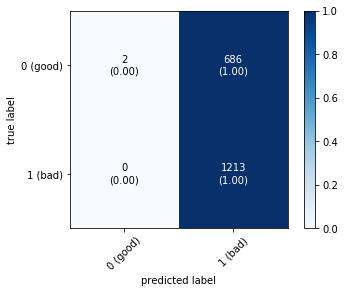

Multiclass
qosClassification nans []
fScore 0.28511309836927934
accuracyScore 0.28511309836927934


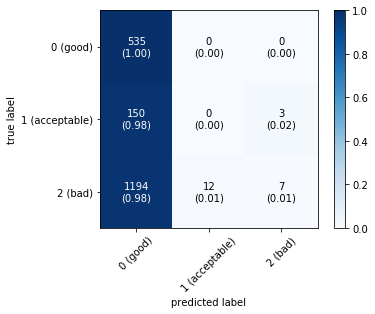

analyse with bytes_per_flow per minute using QoS boundaris of high=.quantile(0.99) and low=quantile(0.70)
high boundary 15523.0
low boundary 9794.0


BinaryClass
qosClassification nans [258]
fScore 0.6421052631578947
accuracyScore 0.6421052631578947


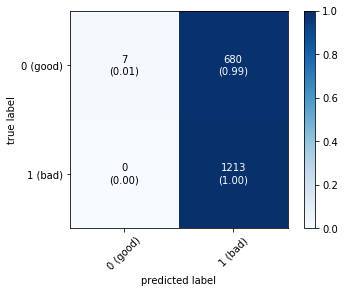

Multiclass
qosClassification nans [258]
fScore 0.6542105263157895
accuracyScore 0.6542105263157895


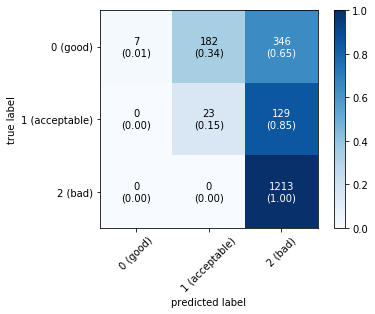

In [245]:
def analyticMethod(metric,aggregation):
 print("analyse with {} per minute using QoS boundaris of high=.quantile(0.99) and low=quantile(0.70)".format(metric))
 dfGroupedAgg =  dfSkydiveFlowsLabeled.groupby(['stress_test','begin','seq']).agg({metric: [aggregation]}).dropna().reset_index()
 dfGroupedAggNoStress = dfGroupedAgg[dfGroupedAgg["stress_test"] == "no_stress"]
 high = round(dfGroupedAggNoStress[metric][aggregation].quantile(0.99))
 low = round(dfGroupedAggNoStress[metric][aggregation].quantile(0.70))
 print('high boundary',high)                                                    
 print('low boundary',low)
 dfTemp = dfGroupedAggNoStress[metric][aggregation].to_frame()
 plotWithBoundaries(dfTemp.sort_values(by=[aggregation]),aggregation,'training skydive samples (no_stress only)','skydive {} per minute'.format(metric),'Training Set Skydive (QoS)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Single threshold',high,high)
 plotWithBoundaries(dfTemp.sort_values(by=[aggregation]),aggregation,'training skydive samples (no_stress only)','skydive {} per minute'.format(metric),'Training Set Skydive (QoS)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Multiple thresholds',low,high)
 dfGroupedAgg = dfSkydiveFlowsLabeledTest.groupby(['begin','seq']).agg({metric: ['std',aggregation]}).dropna().reset_index()
 analyticEstimator(high,low,dfGroupedAgg[metric][aggregation])
analyticMethod('bytes','sum')
analyticMethod('bytes_per_flow','sum')

Iteration 4, loss = 13.21581680
Iteration 5, loss = 13.40691755
Iteration 6, loss = 13.26437401
Iteration 7, loss = 13.14226104
Iteration 8, loss = 13.40213061
Iteration 10, loss = 13.11075560
Iteration 11, loss = 13.61570694
Iteration 12, loss = 4.98182631
Iteration 13, loss = 2.45286663
Iteration 14, loss = 2.44761531
Iteration 15, loss = 2.44448347
Iteration 16, loss = 2.44631701
Iteration 17, loss = 2.44446320
Iteration 18, loss = 2.44355704
Iteration 19, loss = 2.44270162
Iteration 20, loss = 2.44122952
Iteration 21, loss = 2.44450549
Iteration 22, loss = 2.44082263
Iteration 23, loss = 2.44011810
Iteration 24, loss = 2.43940315
Iteration 25, loss = 2.43869402
Iteration 26, loss = 2.44378079
Iteration 27, loss = 2.43826220
Iteration 28, loss = 2.43787977
Iteration 29, loss = 2.43729944
Iteration 30, loss = 2.43789400
Iteration 31, loss = 2.43617055
Iteration 32, loss = 2.43560977
Iteration 33, loss = 2.43486840
Iteration 34, loss = 2.43418093
Iteration 35, loss = 2.43331599
Iterat

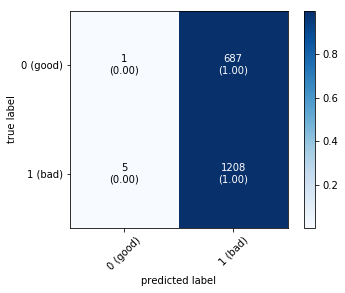


The figure below illustates the best performing classifier from the Binary



The table below shows the first 10 highest scoring Binary



Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations




Multiclass
Iteration 1, loss = 18.25608854
Iteration 2, loss = 17.37289040
Iteration 3, loss = 16.63281641
Iteration 4, loss = 16.99034672
Iteration 5, loss = 16.62726784
Iteration 6, loss = 16.65697554
Iteration 7, loss = 16.28779904
Iteration 8, loss = 16.50185703
Iteration 9, loss = 12.71214531
Iteration 10, loss = 2.77738169
Iteration 11, loss = 2.76866155
Iteration 12, loss = 3.32864843
Iteration 13, loss = 2.76627261
Iteration 14, loss = 2.76519511
Iteration 15, loss = 2.76428315
Iteration 16, loss = 2.76333758
Iteration 17, loss = 2.76243752
Iteration 18, loss = 2.76194380
Iteration 19, loss = 2.76137701
Iteration 20, loss = 2.76051343
Iteration 21, loss = 2.75978657
Iteration 22, loss = 2.75908367
Iteration 23, loss = 2.75843853
Iteration 24, loss = 2.75786117
Iteration 25, loss = 2.75730604
Iteration 26, loss = 2.75651716
Iteration 27, loss = 2.75602417
Iteration 28, loss = 2.75535617
Iteration 29, loss = 2.75492214
Iteration 30, loss = 2.75430108
Iteration 31, loss = 2.7537

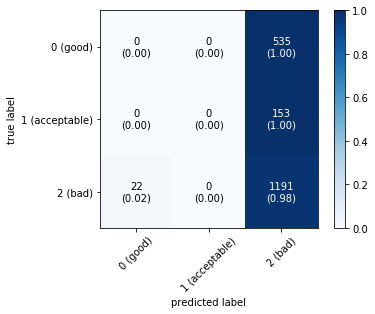


The figure below illustates the best performing classifier from the Multiclass



The table below shows the first 10 highest scoring Multiclass



Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations



Summary


In [242]:
#with warnings.catch_warnings():
# ignore all caught warnings
#  warnings.filterwarnings("ignore")
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)    
import itertools as it
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
classifiers = [MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(1000,1000,1000), verbose=True)]
classifications=[
    {
        'desc':"Binary",
        'bins':[0,indexNoStressHigh,np.inf],
        'names':['0 (good)','1 (bad)'],
        #'names':[0,1],
        'low': indexNoStressHigh,
        'high':indexNoStressHigh
    },
    {
        'desc':"Multiclass",
        'bins':[0,indexNoStressLow,indexNoStressHigh,np.inf],
        'names': ['0 (good)','1 (acceptable)','2 (bad)'], 
        #'names': [0,1,2], 
        'low': indexNoStressLow,
        'high':indexNoStressHigh

        
    }
]
for clf in classifiers:
    print("      ",str(clf)[0:str(clf).index('(')])
print("Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.")
bestFrames = []
for classification in classifications:
    print("")
    print("")
    print("{}".format(classification["desc"]))    
    dfCombinationScores = pd.DataFrame(columns = ['Classification','Classifier','Features','f1_score','accuracy_score','log_loss_score'])
    #dfCombinationScores = pd.DataFrame()
    bestClassifiers = []
    qoeTables=[]
    scores=[] 
    bins = classification['bins']
    names = classification['names']
    #targets = pd.cut(dfIndex['elapse_time'], bins,labels=names)
    #test_targets = pd.cut( dfIndexTest['elapse_time'], bins,labels=names)
    targets = pd.cut(dfIndexMerged['elapse_time'], bins,labels=names)
    #print("targets shape",targets.shape)
    test_targets = pd.cut( dfIndexTestMerged['elapse_time'], bins,labels=names)
    #print("targets test shape",test_targets.shape)
    #for i in range(1,_features.shape[1]+1):
    #for i in range(1,9):
    for i in range(_features.shape[1],_features.shape[1]+1):    
    #okfor i in range(1,2):
        for comb in it.combinations(list(_features.columns),i):
            #print(comb)
            features = pd.DataFrame()
            test_features = pd.DataFrame()
            for f in comb:
                features[f] = _features[f]
                test_features[f] = _test_features[f]
            X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.0, random_state=0)
            if classification["desc"] == "Binary":
                bestClassifier, dfValidationScores = QoEEstimator(classifiers,X_train, y_train,test_features,test_targets)
            else:
                bestClassifier, dfValidationScores = QoEEstimatorMulticlass(classifiers,X_train, y_train,test_features,test_targets)
            qoeTable = ff.create_table(dfValidationScores)
            bestClassifiers.append(bestClassifier.copy())
            qoeTables.append(qoeTable)
            sep=','
            dfValidationScores["Features"] = sep.join(comb)
            scores.append(dfValidationScores)
            #print(bestClassifier)
            dfCombinationScores = dfCombinationScores.append({
                'Classification' : classification["desc"],  
                'Classifier' : bestClassifier["classifier"],  
                'Features' : str(comb).replace(",","<br>"),
                'f1_score' :  bestClassifier["f1_score"],
                'accuracy_score' :  bestClassifier["accuracy_score"],
                #"roc_auc_score" : bestClassifier["roc_auc_score"],
                "log_loss_score" : bestClassifier["log_loss_score"]
            },ignore_index=True)
            
#    dfCombinationScores = dfCombinationScores.sort_values(by=['f1_score','accuracy_score'], ascending=False)
    dfCombinationScores = dfCombinationScores.sort_values(
#      by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
       by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3)

    bestIndex = dfCombinationScores.index[0]
    bestClassifier = bestClassifiers[bestIndex]
    bestFeatures = dfCombinationScores.Features[bestIndex]
    qoeTable = qoeTables[bestIndex]
    
    print("")
    print("The best scoring classifier and features from the {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(1),height_constant=100)
    for i in range(len(table.layout.annotations)):
      table.layout.annotations[i].font.size = 10
    iplot(table)
    bestFrames.append(dfCombinationScores.head(1))
    print("")
    cfm = confusion_matrix(bestClassifier["y_test"],bestClassifier["y_pred"])    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=classification["names"])
    #plt.imshow(fig,cmap='gray')
    plt.show()                      

    print("")
    print("The figure below illustates the best performing classifier from the {}".format(classification["desc"]))
    #print("Best classifier is {}".format(bestClassifier["classifier"]))
    #print("Best QoS features for prediction are  {}".format(bestFeatures))
    title = "QoE from QoS Actual vs Prediction<br> QoE Target: workload duration, <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
    #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples','QoE Classifications<br>0 is good  1 is bad',title,names)
    if classification["desc"] == "Binary":
        #title = "QoE from QoS Actual vs Prediction (Binary Classifications)<br> QoE Target: workload duration,<br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))

        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples','benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Binary Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),                                                                               
            indexNoStressHigh,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
    elif classification["desc"] == "Multiclass":
        #title = "QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> QoE Target: workload duration, QoS features: {} <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestFeatures.replace("<br>",","),bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples',
            'benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),
            indexNoStressLow,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
        ;
        
    print("")
    print("The table below shows the first 10 highest scoring {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(10),height_constant=100)
    for i in range(len(table.layout.annotations)):
        table.layout.annotations[i].font.size = 10
    iplot(table)
    print("")
    print("Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations")
    dfScores = pd.concat(scores,sort=False)
    dfScores.sort_values(by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True],inplace=True)
    plotScores(dfScores[:10].Classifier + ',' + dfScores[:10].Features,dfScores[:10].f1_score,"Classifier + Features","f1_score","Classifier + Features by f1_score")
    #plotScores(dfScores[:10].Features,dfScores[:10].f1_score,"Features","f1_score","Features by f1_score")
    #plotScores(dfScores[:10].Classifier,dfScores[:10].f1_score,"Classifier","f1_score","Classifier by f1_score")
print("")
print("Summary")
table = ff.create_table(pd.concat(bestFrames),height_constant=100)
for i in range(len(table.layout.annotations)):
   table.layout.annotations[i].font.size = 10
iplot(table)    
    
    

In [243]:
print(stopTheWorldNow)

NameError: name 'stopTheWorldNow' is not defined

In [ ]:
!pip install deap update_checker tqdm stopit
!pip install xgboost
!pip install TPOT
from tpot import TPOTClassifier

In [ ]:
#with warnings.catch_warnings():
# ignore all caught warnings
#  warnings.filterwarnings("ignore")
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)    
import itertools as it
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_depth=5),
               KNeighborsClassifier(3),
               LinearDiscriminantAnalysis(),
               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
               GaussianNB(),
               #SVC(probability=True),
               #MLPClassifier(alpha=1, max_iter=1000),
               #GaussianProcessClassifier(1.0 * RBF(1.0)),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis()]
#classifiers = [LogisticRegression(),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(3),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
#               GaussianNB(),SVC(),MLPClassifier()]
#classifiers = [LogisticRegression(),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0)]
#classifiers = [MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(1000,1000,1000), verbose=True)]
classifiers = [TPOTClassifier(generations=30,verbosity=2)]
classifications=[
    {
        'desc':"Binary",
        'bins':[0,indexNoStressHigh,np.inf],
        'names':['0 (good)','1 (bad)'],
        #'names':[0,1],
        'low': indexNoStressHigh,
        'high':indexNoStressHigh
    },
    {
        'desc':"Multiclass",
        'bins':[0,indexNoStressLow,indexNoStressHigh,np.inf],
        'names': ['0 (good)','1 (acceptable)','2 (bad)'], 
        #'names': [0,1,2], 
        'low': indexNoStressLow,
        'high':indexNoStressHigh

        
    }
]
_features = pd.DataFrame()    
#_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAgg['flow_duration']['mean']
#_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['mean'] 
#_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['mean'] 
#_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['mean'] 
#_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['mean'] 
#_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['mean'] 
#_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['mean']
#_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']
#_features['flow_duration_count'] = dfSkydiveFlowsLabeledAgg['flow_duration']['count']
_features['bytes_per_flow_sum'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['sum'] 
_features['packets_per_flow_sum'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['sum'] 
#_features['AB_bytes_per_flow_sum'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['sum'] 
_features['BA_bytes_per_flow_sum'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['sum'] 
#_features['AB_packets_per_flow_sum'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['sum'] 
_features['BA_packets_per_flow_sum'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['sum']

#_features.dropna(inplace=True)
#print("targets shape",targets.shape)
print("_features shape",_features.shape)


_test_features = pd.DataFrame()    
#_test_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAggTest['flow_duration']['mean']
#_test_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAggTest['bytes_per_flow']['mean'] 
#_test_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAggTest['packets_per_flow']['mean'] 
#_test_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAggTest['AB_bytes_per_flow']['mean'] 
#_test_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAggTest['BA_bytes_per_flow']['mean'] 
#_test_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAggTest['AB_packets_per_flow']['mean'] 
#_test_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest['BA_packets_per_flow']['mean']
#_test_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']
#_test_features['flow_duration_count'] = dfSkydiveFlowsLabeledAggTest['flow_duration']['count']
_test_features['bytes_per_flow_sum'] = dfSkydiveFlowsBytesPerFlowLabeledAggTest['bytes_per_flow']['sum'] 
_test_features['packets_per_flow_sum'] = dfSkydiveFlowsPacketsPerFlowLabeledAggTest['packets_per_flow']['sum'] 
#_test_features['AB_bytes_per_flow_sum'] = dfSkydiveFlowsABBytesPerFlowLabeledAggTest['AB_bytes_per_flow']['sum'] 
_test_features['BA_bytes_per_flow_sum'] = dfSkydiveFlowsBABytesPerFlowLabeledAggTest['BA_bytes_per_flow']['sum'] 
#_test_features['AB_packets_per_flow_sum'] = dfSkydiveFlowsABPacketsPerFlowLabeledAggTest['AB_packets_per_flow']['sum'] 
_test_features['BA_packets_per_flow_sum'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest['BA_packets_per_flow']['sum']

print("_test_features shape",_test_features.shape)
#_test_features.dropna(inplace=True)
#print("_test_features nan",_test_features.isna())



#print("Do ML Classification")
#print("training set size",_features.shape[0])
#print("testing set size",_test_features.shape[0])
print("QoS features:")
for f in list(_features.columns):
    print("      ",f)
print("Classifiers:")
for clf in classifiers:
    print("      ",str(clf)[0:str(clf).index('(')])
print("Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.")
bestFrames = []
for classification in classifications:
    print("")
    print("")
    print("{}".format(classification["desc"]))    
    dfCombinationScores = pd.DataFrame(columns = ['Classification','Classifier','Features','f1_score','accuracy_score','log_loss_score'])
    #dfCombinationScores = pd.DataFrame()
    bestClassifiers = []
    qoeTables=[]
    scores=[] 
    bins = classification['bins']
    names = classification['names']
    #targets = pd.cut(dfIndex['elapse_time'], bins,labels=names)
    #test_targets = pd.cut( dfIndexTest['elapse_time'], bins,labels=names)
    targets = pd.cut(dfIndexMerged['elapse_time'], bins,labels=names)
    #print("targets shape",targets.shape)
    test_targets = pd.cut( dfIndexTestMerged['elapse_time'], bins,labels=names)
    #print("targets test shape",test_targets.shape)
    #for i in range(1,_features.shape[1]+1):
    #for i in range(1,9):
    for i in range(_features.shape[1],_features.shape[1]+1):    
    #okfor i in range(1,2):
        for comb in it.combinations(list(_features.columns),i):
            #print(comb)
            features = pd.DataFrame()
            test_features = pd.DataFrame()
            for f in comb:
                features[f] = _features[f]
                test_features[f] = _test_features[f]
            X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.0, random_state=0)           
            bestClassifier, dfValidationScores = QoEEstimator(classifiers,X_train, y_train,test_features,test_targets)
            qoeTable = ff.create_table(dfValidationScores)
            bestClassifiers.append(bestClassifier.copy())
            qoeTables.append(qoeTable)
            sep=','
            dfValidationScores["Features"] = sep.join(comb)
            scores.append(dfValidationScores)
            #print(bestClassifier)
            dfCombinationScores = dfCombinationScores.append({
                'Classification' : classification["desc"],  
                'Classifier' : bestClassifier["classifier"],  
                'Features' : str(comb).replace(",","<br>"),
                'f1_score' :  bestClassifier["f1_score"],
                'accuracy_score' :  bestClassifier["accuracy_score"],
                #"roc_auc_score" : bestClassifier["roc_auc_score"],
                "log_loss_score" : bestClassifier["log_loss_score"]
            },ignore_index=True)
            
#    dfCombinationScores = dfCombinationScores.sort_values(by=['f1_score','accuracy_score'], ascending=False)
    dfCombinationScores = dfCombinationScores.sort_values(
#      by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
       by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3)

    bestIndex = dfCombinationScores.index[0]
    bestClassifier = bestClassifiers[bestIndex]
    bestFeatures = dfCombinationScores.Features[bestIndex]
    qoeTable = qoeTables[bestIndex]
    
    print("")
    print("The best scoring classifier and features from the {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(1),height_constant=100)
    for i in range(len(table.layout.annotations)):
      table.layout.annotations[i].font.size = 10
    iplot(table)
    bestFrames.append(dfCombinationScores.head(1))
    print("")
    cfm = confusion_matrix(bestClassifier["y_test"],bestClassifier["y_pred"])    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=classification["names"])
    #plt.imshow(fig,cmap='gray')
    plt.show()                      

    print("")
    print("The figure below illustates the best performing classifier from the {}".format(classification["desc"]))
    #print("Best classifier is {}".format(bestClassifier["classifier"]))
    #print("Best QoS features for prediction are  {}".format(bestFeatures))
    title = "QoE from QoS Actual vs Prediction<br> QoE Target: workload duration, <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
    #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples','QoE Classifications<br>0 is good  1 is bad',title,names)
    if classification["desc"] == "Binary":
        #title = "QoE from QoS Actual vs Prediction (Binary Classifications)<br> QoE Target: workload duration,<br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))

        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples','benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Binary Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),                                                                               
            indexNoStressHigh,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
    elif classification["desc"] == "Multiclass":
        #title = "QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> QoE Target: workload duration, QoS features: {} <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestFeatures.replace("<br>",","),bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexMerged,'stress_test','elapse_time',
            'testing samples',
            'benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),
            indexNoStressLow,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
        ;
        
    print("")
    print("The table below shows the first 10 highest scoring {}".format(classification["desc"]))
    table = ff.create_table(dfCombinationScores.head(10),height_constant=100)
    for i in range(len(table.layout.annotations)):
        table.layout.annotations[i].font.size = 10
    iplot(table)
    print("")
    print("Illustrate f1-scores comparison of the 10 high scoring Classifier and Feature Combinations")
    dfScores = pd.concat(scores,sort=False)
    dfScores.sort_values(by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True],inplace=True)
    plotScores(dfScores[:10].Classifier + ',' + dfScores[:10].Features,dfScores[:10].f1_score,"Classifier + Features","f1_score","Classifier + Features by f1_score")
    #plotScores(dfScores[:10].Features,dfScores[:10].f1_score,"Features","f1_score","Features by f1_score")
    #plotScores(dfScores[:10].Classifier,dfScores[:10].f1_score,"Classifier","f1_score","Classifier by f1_score")
print("")
print("Summary")
table = ff.create_table(pd.concat(bestFrames),height_constant=100)
for i in range(len(table.layout.annotations)):
   table.layout.annotations[i].font.size = 10
iplot(table)    
    
    